In [1]:
import os
import pandas as pd # Data manipulation
import numpy as np # scientific computuation

import missingno as msno # Missing data visualization module


import warnings
warnings.filterwarnings('ignore')

In [2]:
#project root
PROJ_ROOT = os.path.join(os.pardir)#data path
insurance_data_path = os.path.join(PROJ_ROOT,
                                  "data",
                                  "raw",
                                  "insurance.csv")

In [3]:
#data-frame

df = pd.read_csv(insurance_data_path)

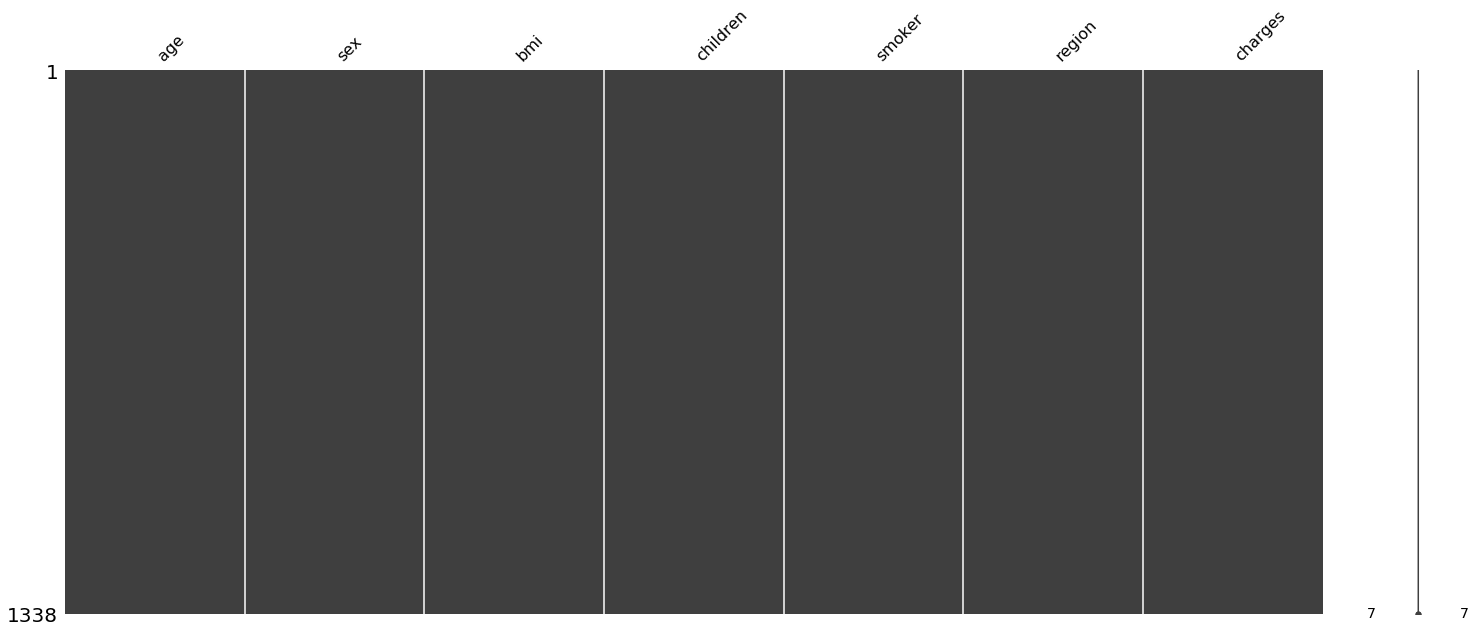

In [4]:
msno.matrix(df)

In [5]:
# Dummy variable
categorical_columns = ['sex','children', 'smoker', 'region']
df_encode = pd.get_dummies(data = df, prefix = None, prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [6]:
 #Lets verify the dummay variable process
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Number of rows and columns in the dataset: (1338, 7)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'charges' 'sex_male' 'children_1' 'children_2' 'children_3'
 'children_4' 'children_5' 'smoker_yes' 'region_northwest'
 'region_southeast' 'region_southwest']

Number of rows and columns in the dataset: (1338, 13)


In [7]:
from scipy.stats import boxcox
y_bc,lam, ci= boxcox(df_encode['charges'],alpha=0.05)


# it did not perform better for this model, so log transform is used
ci,lam

((-0.01140290617294196, 0.0988096859767545), 0.043649053770664956)

In [8]:
df_encode['age_smoker_yes'] = df_encode['age']* df_encode['smoker_yes']
df_encode['age_sex_male'] = df_encode['age']* df_encode['sex_male']

df_encode.shape

(1338, 15)

In [9]:
df_encode.head()

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest,age_smoker_yes,age_sex_male
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1,19,0
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0,0,18
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0,0,28
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0,0,33
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0,0,32


In [10]:
#Saving data to processed
df_encode.to_csv("processed-insurance.csv")